In [1]:
# Importing packages and libraries 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')
import pandas as pd
import numpy as np

In [2]:
drink_menu_exp = pd.read_csv('starbucks_drinkMenu_expanded.csv')
drink_menu = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
food_menu = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='utf-16')

### Data Cleaning: 
- Renaming Columns 

In [37]:
# Rename columns
drink_menu_exp = drink_menu_exp.rename(columns={' Total Fat (g)': 'Total Fat', 'Trans Fat (g) ': 'Trans Fat',
                                            'Saturated Fat (g)': 'Saturated Fat', ' Sodium (mg)': 'Sodium_mg',
                                            ' Total Carbohydrates (g) ': 'Total Carbohydrates',
                                            'Cholesterol (mg)': 'Cholesterol_mg', ' Dietary Fibre (g)': 'Dietary Fibre',
                                            ' Sugars (g)': 'Sugars', ' Protein (g) ': 'Protein',
                                            'Vitamin A (% DV) ': 'Vitamin A', 'Vitamin C (% DV)': 'Vitamin C',
                                            ' Calcium (% DV) ': 'Calcium', 'Iron (% DV) ': 'Iron',
                                                'Caffeine (mg)': 'Caffeine_mg'})

drink_menu = drink_menu.rename(columns={'Unnamed: 0':"Beverage", 'Fat (g)':'Fat', 'Carb. (g)': 'Carbohydrates', 'Fiber (g)': 'Fiber'})

food_menu = food_menu.rename(columns={'Unnamed: 0':"Food_Item", ' Calories': 'Calories', ' Fat (g)':'Fat', ' Carb. (g)': 'Carbohydrates', ' Fiber (g)': 'Fiber',
                                            ' Protein (g)': 'Protein'})

### Expanded Starbucks Menu

- Need to clean the Beverage Prep column - certain rows are missing the size 
- There is only one null value - caffine column

- Future exploration: 
    - Comaprison of Signature vs. Classic Espresso Drinks 
    - Comaprison of Coffee vs. tea refresher 
    - Comaprison of Calories vs. protein intake 
    - Drinks with or without whipped cream 

- Which drinks/food offer the most nutritional value? 
- What should you avoid? 

In [7]:
print("Size of the Expanded Drink Menu dataset: ", drink_menu_exp.shape)
drink_menu_exp.head()

Size of the Expanded Drink Menu dataset:  (242, 18)


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium_mg,Total Carbohydrates,Cholesterol_mg,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [83]:
drink_menu_exp.isnull().sum()

Beverage_category      0
Beverage               0
Beverage_prep          0
Calories               0
Total Fat              0
Trans Fat              0
Saturated Fat          0
Sodium_mg              0
Total Carbohydrates    0
Cholesterol_mg         0
Dietary Fibre          0
Sugars                 0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
Caffeine_mg            1
dtype: int64

In [6]:
drink_menu_exp.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat', 'Trans Fat', 'Saturated Fat', 'Sodium_mg',
       'Total Carbohydrates', 'Cholesterol_mg', 'Dietary Fibre', 'Sugars',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Caffeine_mg'],
      dtype='object')

In [8]:
drink_menu_exp.Beverage.value_counts()

Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)               12
Caffè Mocha (Without Whipped Cream)                    12
Caffè Latte                                            12
Iced Brewed Coffee (With Milk & Classic Syrup)          9
Caramel (Without Whipped Cream)                         9
Java Chip (Without Whipped Cream)                       9
Mocha (Without Whipped Cream)                           9
Strawberries & Crème (Without Whipped Cream)            9
Brewed Coffee 

In [9]:
drink_menu_exp.Beverage_category.value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Starbucks Beverage Categories')]

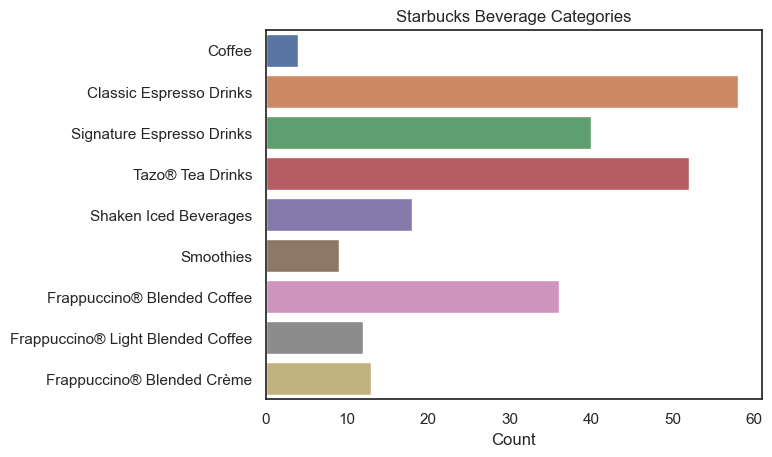

In [105]:
sns.countplot(y=drink_menu_exp.Beverage_category, orient='h').set(xlabel='Count', ylabel='',
                                                                  title='Starbucks Beverage Categories') 

In [10]:
drink_menu_exp.Beverage_prep.value_counts()

Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Tall                   7
Grande                 7
Venti                  7
Short                  4
Solo                   1
Doppio                 1
Name: Beverage_prep, dtype: int64

In [11]:
#Beverage_prep - needs cleaning - incorrect values - needs associated size for certain 
drink_menu_exp[drink_menu_exp['Beverage'] == 'Vanilla Latte (Or Other Flavoured Latte)'].head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium_mg,Total Carbohydrates,Cholesterol_mg,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine_mg
28,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Short Nonfat Milk,100,0.1,0.1,0.0,5,70,19,0,18,6.0,10%,0%,20%,0%,75
29,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,130,3.5,1.5,0.1,15,80,18,0,17,6.0,10%,0%,20%,0%,75
30,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Soymilk,110,2.5,0.3,0.0,0,60,16,1,13,5.0,6%,0%,20%,8%,75
31,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Tall Nonfat Milk,150,0.2,0.1,0.0,5,110,28,0,27,9.0,15%,0%,30%,0%,75
32,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,200,5,2.5,0.2,20,125,28,0,27,9.0,15%,0%,30%,0%,75


In [12]:
drink_menu_exp[drink_menu_exp['Beverage_category'].str.contains('Coffee')]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium_mg,Total Carbohydrates,Cholesterol_mg,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
181,Frappuccino® Blended Coffee,Coffee,Tall Nonfat Milk,160,0.1,0.0,0.0,0,160,36,0,36,3.0,4%,0%,10%,10%,0
182,Frappuccino® Blended Coffee,Coffee,Whole Milk,180,2.5,1.5,0.1,10,160,36,0,36,3.0,4%,0%,8%,0%,70
183,Frappuccino® Blended Coffee,Coffee,Soymilk,160,1.5,0.2,0.0,0,150,35,0,34,2.0,4%,0%,10%,0%,70
184,Frappuccino® Blended Coffee,Coffee,Grande Nonfat Milk,220,0.1,0.1,0.0,0,210,51,0,50,4.0,6%,0%,10%,4%,70
185,Frappuccino® Blended Coffee,Coffee,Whole Milk,240,3,2.0,0.1,10,220,50,0,50,3.0,4%,0%,10%,0%,95
186,Frappuccino® Blended Coffee,Coffee,Soymilk,220,1.5,0.2,0.0,0,210,49,0,47,3.0,4%,0%,10%,0%,95


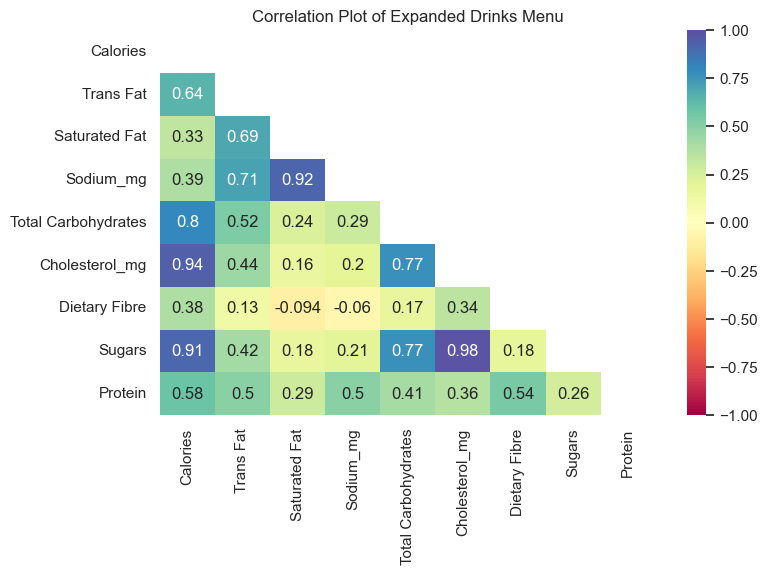

In [13]:
plt.figure(figsize=(8, 5))
mask = np.triu(np.ones_like(drink_menu_exp.corr(), dtype=bool)) # Used to make a triangular plot
corrplot = sns.heatmap(drink_menu_exp.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap='Spectral').set_title("Correlation Plot of Expanded Drinks Menu")
plt.show()

In [ ]:
#Sugar and Choleestrol and Carbs 
#Sodium and Trans fat

In [ ]:
# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,12))

# sns.histplot(drink_menu_exp, x="Calories", kde=True, stat='frequency', ax=ax[0])
# sns.histplot(drink_menu_exp, x=" Sugars", kde=True, stat='frequency', ax=ax[1])
# sns.histplot(drink_menu_exp, x="Cholesterol_mg", kde=True, stat='frequency', ax=ax[2])

### Drinks Menu

Nutrition information for Starbucks drink menu items. Missing data marked with a dash, "-". All drink nutrition information is for a 12 oz., or "Tall", drink.

85 rows are missing. Can we compare this list with the expanded menu above? 

In [23]:
print("Size of the Drink Menu dataset: ", drink_menu.shape)
print("Features: ", drink_menu.columns)
drink_menu.head()

Size of the Drink Menu dataset:  (177, 7)
Features:  Index(['Beverage', 'Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein',
       'Sodium'],
      dtype='object')


,Beverage,Calories,Fat,Carbohydrates,Fiber,Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [28]:
# 85 rows are missing  - Can we find these in the expanded drink menu before we delete these rows 
missing_drinks = drink_menu[drink_menu.eq('-').any(axis=1)]
print(f'{missing_drinks.shape[0]} rows are missing:')
missing_drinks.head()

85 rows are missing:


,Beverage,Calories,Fat,Carbohydrates,Fiber,Protein,Sodium
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
5,Violet Drink,-,-,-,-,-,-
6,Evolution Fresh™ Cold-Pressed Apple Berry Juice,-,-,-,-,-,-
7,Evolution Fresh™ Defense Up,-,-,-,-,-,-


In [32]:
beverages = drink_menu[~drink_menu.isin(missing_drinks)].dropna()
beverages.sort_values(by=['Calories'], ascending=False).head()

,Beverage,Calories,Fat,Carbohydrates,Fiber,Protein,Sodium
55,Starbucks Refreshers™ Raspberry Pomegranate,90,0,27,0,0,0
56,Starbucks Refreshers™ Strawberry Lemonade,90,0,27,0,0,0
37,Teavana® Shaken Iced Passion Tango™ Tea Lemonade,90,0,24,0,0,0
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
18,Shaken Sweet Tea,80,0,19,0,0,10


In [34]:
#Suspicious - very unlikely that these drinks do not have fat
beverages.Fat.value_counts()

0      54
2.5     9
6       6
7       6
9       3
4       3
5       2
8       2
4.5     2
26      1
1       1
11      1
0.5     1
2       1
Name: Fat, dtype: int64

In [109]:
beverages.Fiber.value_counts()

0    80
1     3
2     3
4     3
5     1
8     1
7     1
Name: Fiber, dtype: int64

In [111]:
beverages.Protein.value_counts()

0     45
1     10
5      6
12     6
10     5
20     3
14     2
13     2
8      2
11     2
7      2
3      2
4      2
9      1
15     1
16     1
Name: Protein, dtype: int64

### Food Menu

- No sugar or sodium data available on the food items
- No missing values

In [38]:
print("Size of the Food Menu dataset: ", food_menu.shape)
print("Features: ", food_menu.columns)
food_menu.head()

Size of the Food Menu dataset:  (113, 6)
Features:  Index(['Food_Item', 'Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein'], dtype='object')


,Food_Item,Calories,Fat,Carbohydrates,Fiber,Protein
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [46]:
food_menu.sort_values(by=['Calories', 'Protein'], ascending=False).head()

,Food_Item,Calories,Fat,Carbohydrates,Fiber,Protein
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23
61,Green Goddess Avocado Salad,620,37.0,62,10,13
65,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6,32
54,Strawberries & Jam Sandwich,600,25.0,80,10,19
70,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27


In [78]:
food_sorted_tmp = food_menu.sort_values(by=['Calories', 'Fat'], ascending=False)
food_sorted_tmp.head()

,Food_Item,Calories,Fat,Carbohydrates,Fiber,Protein
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23
61,Green Goddess Avocado Salad,620,37.0,62,10,13
65,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6,32
54,Strawberries & Jam Sandwich,600,25.0,80,10,19
70,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27


<AxesSubplot:xlabel='Calories', ylabel='Protein'>

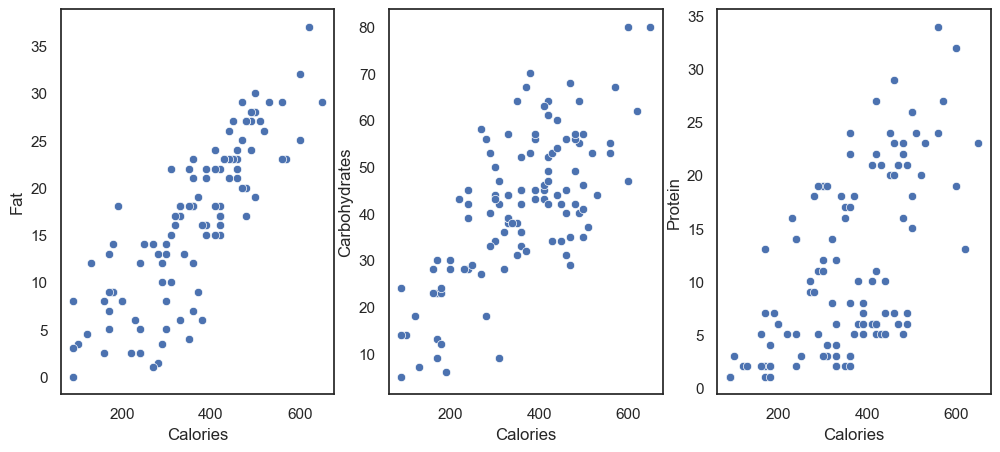

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

sns.scatterplot(data=food_sorted_tmp, x='Calories', y='Fat', ax=ax[0])
sns.scatterplot(data=food_menu, x='Calories', y='Carbohydrates', ax=ax[1])
sns.scatterplot(data=food_menu, x="Calories", y='Protein', ax=ax[2])